In [1]:
import pandas as pd

import sys
sys.path.append('../scripts')

from preprocess import clean_data, find_columns_with_missing_value
from report import data_quality_report, plot_time_series, correlation_matrix, plot_bubble_chart,plot_scatter_chart,plot_histogram_chart, plot_avg_moda_modb, plot_redial, plot_RH_relation



**Data Loading**

We start by bringing in raw datasets from Benin, Sierra Leone, and Togo, ensuring we have all the necessary data for analysis.

In [2]:
# Reading the data
data = pd.read_csv('../data/benin-malanville.csv')


**Initial Data information**

By using data.info() we can see the properties of each columns name, non-null count and data type

In [3]:
#variables info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

**Missing values**

Based on the requirement we will filter out variables with 5% or more null values by using find_columns_with_missing_value that takes dataframe and threshold the threshold is a optional argument by default threshold is set to 0.05 or 5%

In [4]:
#get columns with 5% or more null values
find_columns_with_missing_value(data)   

columns above the threshold


['Comments']

**Taking backup**

Taking the copy of the original data to make sure we can compare it to the processed data on the later date.

In [5]:
df_copy = data.copy()

**KPI(Key Preformance Indicator)**

Variables that will give as key insight about the data

In [6]:
target_cols = [ 'GHI', 'DNI', 'DHI', 'ModA', 'ModB','WS', 'WSgust']

**Overall state of the data**

This shows the overall missing, zero values, negative values and out of range total values to help us determine whether to impute or drop variables 

In [7]:
before_dataclean = data_quality_report(df_copy)
before_dataclean

,Missing Values,Zero Values,Negative Values,Out of Range
BP,0,0,0.0,NaN
Cleaning,0,525115,0.0,NaN
Comments,525600,0,0.0,NaN
DHI,0,388,259182.0,NaN
DNI,0,5884,275987.0,NaN
GHI,0,363,258847.0,258847.0
ModA,0,245543,0.0,NaN
ModB,0,245975,0.0,NaN
Precipitation,0,521811,0.0,NaN
RH,0,0,0.0,0.0


#### Data cleaning
Drops and impute missing values, error values, incorrect entries and wrong datatypes

In [8]:
cleaned_data = clean_data(df_copy, target_cols)

Processing columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']
Found 90 outliers in column 'GHI'.
Median value for 'GHI' (used for replacement): 1.8
Outliers in column 'GHI' replaced with median.
Found 2 outliers in column 'DNI'.
Median value for 'DNI' (used for replacement): 0.0
Outliers in column 'DNI' replaced with median.
Found 3889 outliers in column 'DHI'.
Median value for 'DHI' (used for replacement): 1.6
Outliers in column 'DHI' replaced with median.
Found 27 outliers in column 'ModA'.
Median value for 'ModA' (used for replacement): 4.5
Outliers in column 'ModA' replaced with median.
Found 63 outliers in column 'ModB'.
Median value for 'ModB' (used for replacement): 4.3
Outliers in column 'ModB' replaced with median.
Found 3109 outliers in column 'WS'.
Median value for 'WS' (used for replacement): 1.9
Outliers in column 'WS' replaced with median.
Found 3500 outliers in column 'WSgust'.
Median value for 'WSgust' (used for replacement): 2.6
Outliers in column '

**To double check if the data values are as expected**

In [9]:
after_clean_report = data_quality_report(cleaned_data)
after_clean_report


,Missing Values,Zero Values,Negative Values,Out of Range
BP,0,0,0.0,NaN
Cleaning,0,525115,0.0,NaN
DHI,0,259570,0.0,NaN
DNI,0,281873,0.0,NaN
GHI,0,259210,0.0,0.0
ModA,0,245543,0.0,NaN
ModB,0,245975,0.0,NaN
Precipitation,0,521811,0.0,NaN
RH,0,0,0.0,0.0
TModA,0,0,0.0,NaN


**Create a new csv**

The data values has been cleaned and now save on a different csv file

In [10]:
cleaned_data.to_csv(f"../data/benin_clean.csv")

**Plotting a time series**

As show in the time series you can see for GHI, DNI, DHI, Tamb Vs. Timestamp

/home/mikiask/anotherproject/solar-challenge-week0/notebooks/../scripts/report.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


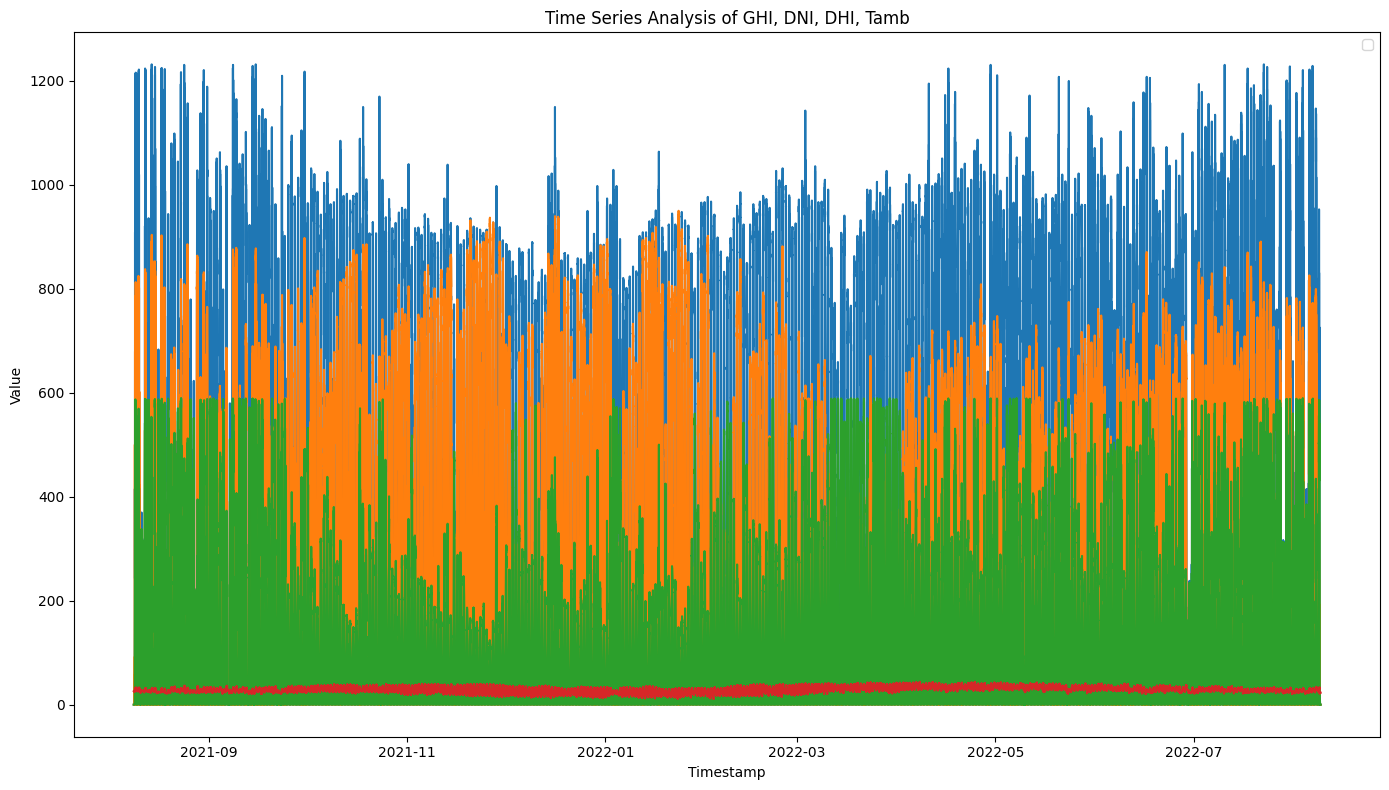

In [11]:
plot_time_series(cleaned_data)

**Correlation matrix**

This matrix shows the relationship between GHI, DNI, DHI, TModA, TModB

Correlation matrix for target columns:
            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.881421  0.829456  0.919253  0.873488
DNI    0.881421  1.000000  0.564613  0.790091  0.755757
DHI    0.829456  0.564613  1.000000  0.807422  0.767185
TModA  0.919253  0.790091  0.807422  1.000000  0.983443
TModB  0.873488  0.755757  0.767185  0.983443  1.000000


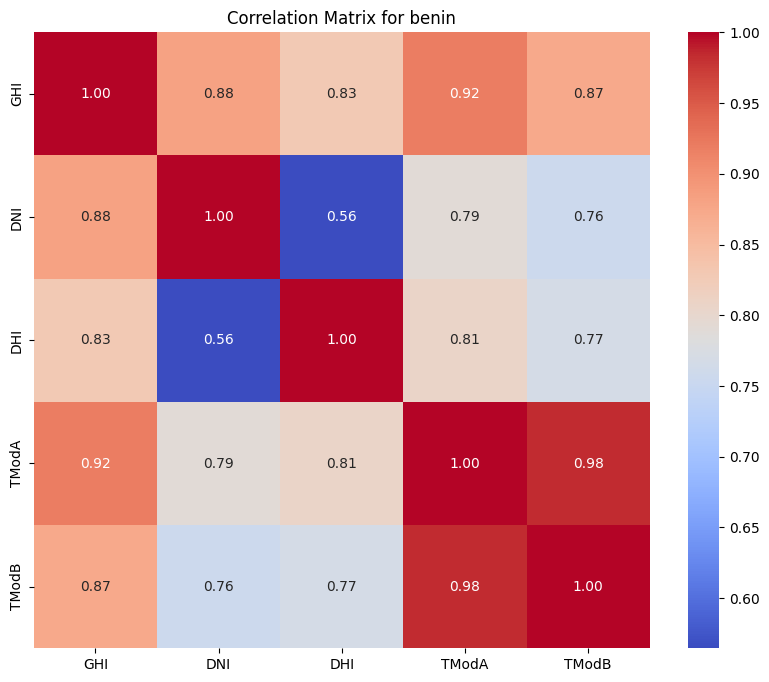

In [12]:
#
print("Correlation matrix for target columns:")
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
print(cleaned_data[cols].corr())
correlation_matrix(cleaned_data, cols, 'benin')

#### Scatter plot

**WS, WSgust, WD vs. GHI**

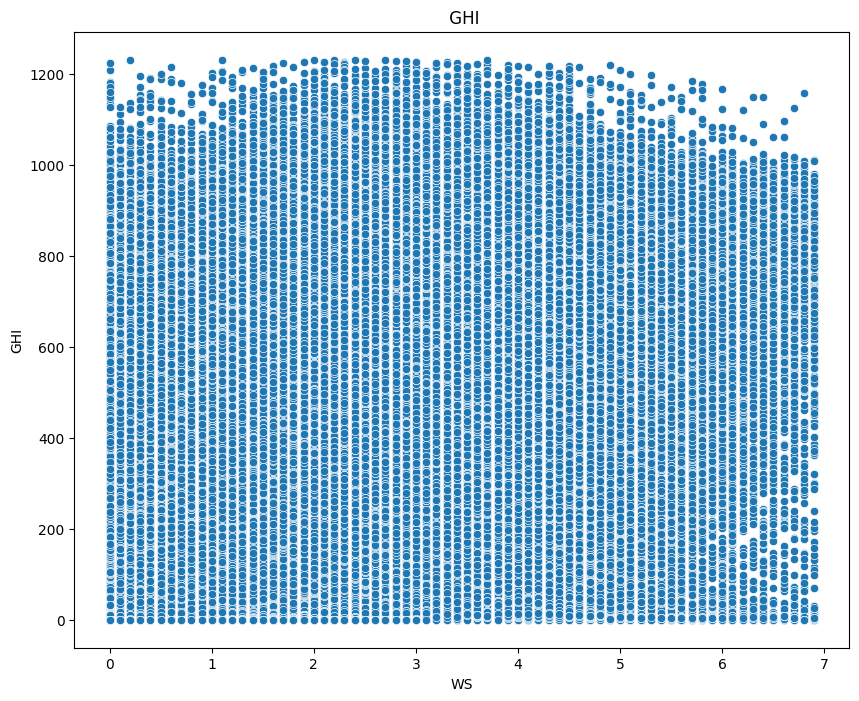

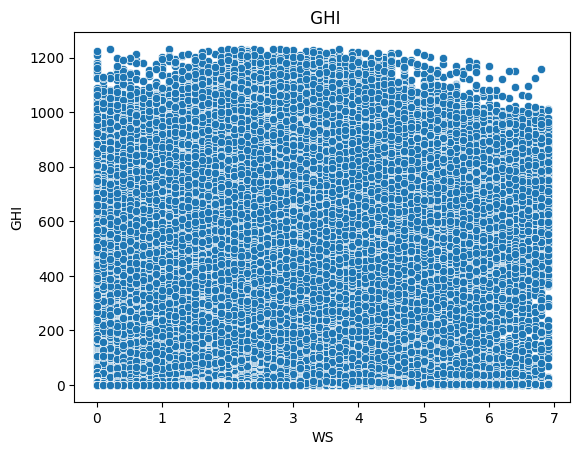

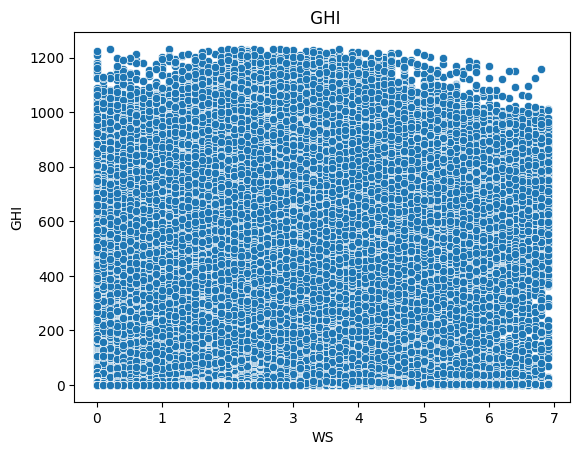

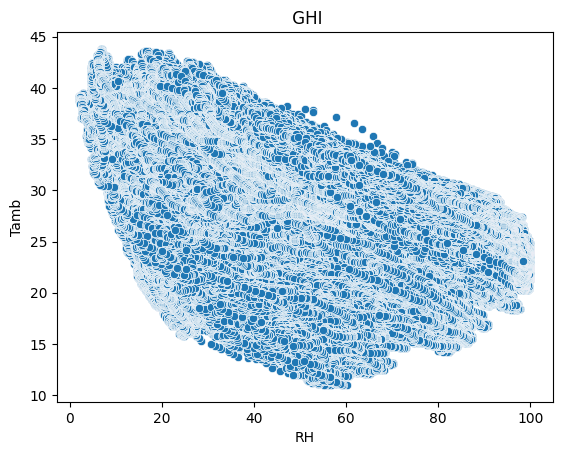

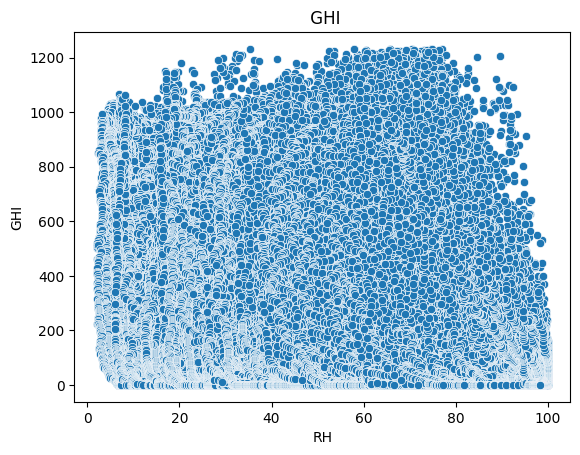

In [13]:
plot_scatter_chart(cleaned_data)

### EDA
**Bubble chart analysis**

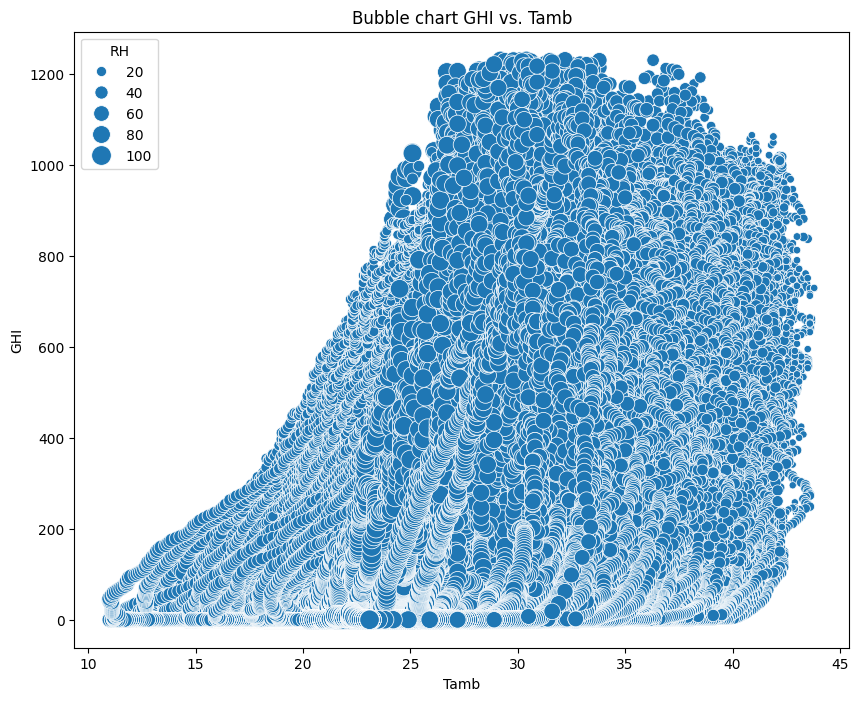

In [14]:
plot_bubble_chart(cleaned_data)

**Histogram**

In [15]:
#plot_histogram_chart(cleaned_data)

### **Group by Cleaning flag and plot average ModA & ModB pre/post-clean in python**

**post-clean**

   Cleaning        ModA        ModB
0         0  236.459225  228.669520
1         1  307.229278  301.972165


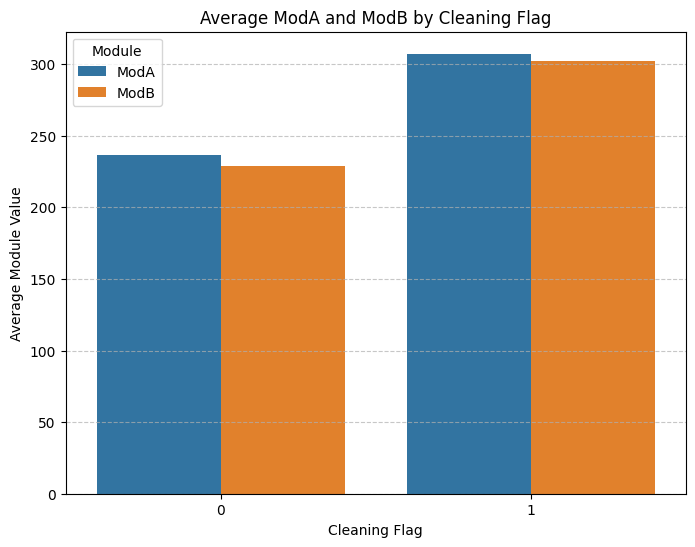

In [16]:
plot_avg_moda_modb(cleaned_data)

**Pre-clean**

   Cleaning        ModA        ModB
0         0  236.524253  228.816071
1         1  307.229278  301.972165


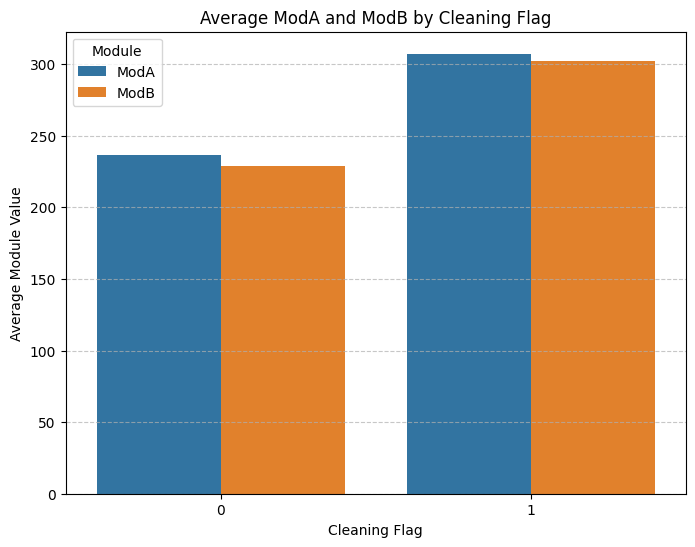

In [17]:
plot_avg_moda_modb(df_copy);

#### Radial graph to show windspeed vs. wind-direction

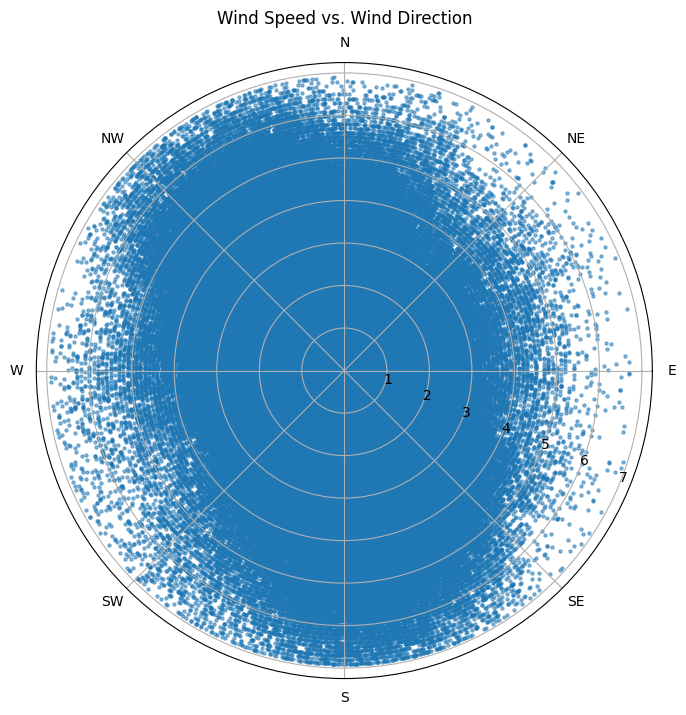

In [18]:
plot_redial(cleaned_data)

**plot relationship between Relative Humidity and Temperatuere**

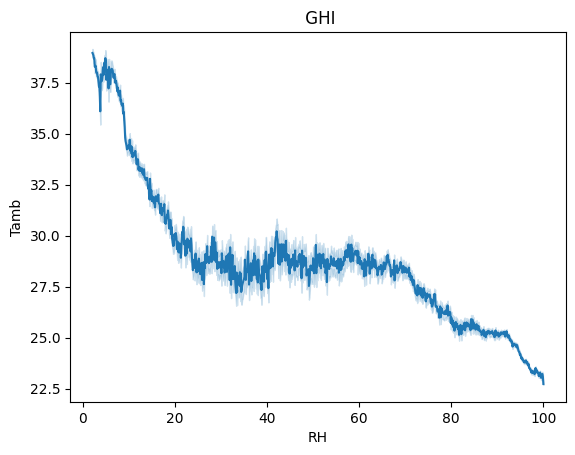

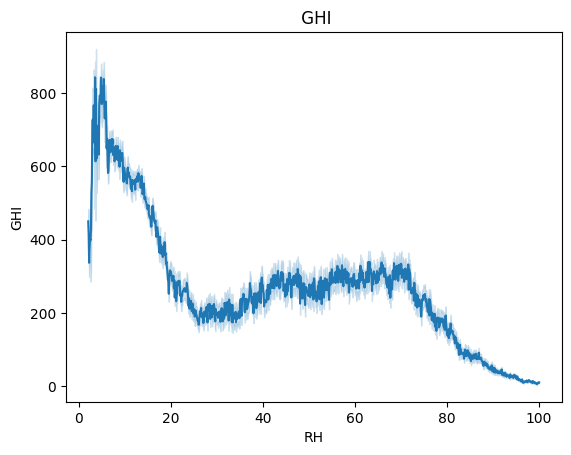

In [19]:
plot_RH_relation(cleaned_data)